# Datum transformation: Aratu -> SAD69

The first challenge to create a project with both seismic and well data is to stabilish a common datum. The seismic data in Brazil is stored in SAD69 while well data, mainly the old ones, are stored in the Aratu datum. Here I've used nine wells to find the difference between the two datums. For a more precise location it's used the Molodensky transformation. But the error between the approaches is less than 1 meter. **Important:** The codes below are valid for Aratu datum, central meridian 39. The Aratu datum is limited to some regions of Brazil. See the map below (Anciães, 2003):

In [1]:
from IPython.display import Image

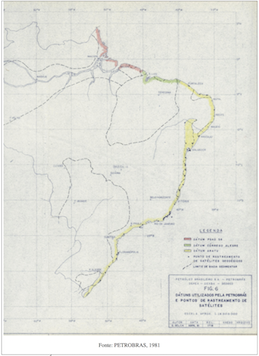

In [2]:
Image("imagens/aratu-brazil.png")

The Aratu datum is identified by the yellow color.

## The Molodensky simplified formula

$\Delta \phi^\circ= \frac{1}{M_1} \{(a_1 \Delta f + f_1 \Delta a)  \ sin \ 2 \phi_1 - \Delta X \ sin \ \phi_1 \ \ cos \ \lambda_1 - \Delta Y \ sin \ \phi_1 \ \ sin \ \lambda_1 + \Delta Z \ \ cos \ \phi_1\} \frac{180}{\pi}$

$\quad \quad M = \frac{a(1 - e^2)}{(1 - e^2 \ sin^2 \ \phi)^{3/2}}$

$ \Delta \lambda^\circ = \frac{1}{N_1 \ cos \ \phi_1} \{-\Delta X \ sen \ \lambda_1 + \Delta Y cos \ \lambda_1\} \frac{180}{\pi}$

$\quad \quad N = \frac{a}{(1 - e^2 \ sin^2 \phi)^{1/2}}$

$\quad \quad \quad e^2 = f(2-f) \quad \quad e'^2 = \frac{e^2}{1-e^2}$

Where, $M$ and $N$ = meridional and prime vertical radii of curvature, respectively, at a given latitude; $\phi$ = geodetic latitude; $\lambda$ = geodetic longitude; $a$ = semi-major axis of the local geodetic datum ellipsoid; $b$ = semi-minor axis of the local geodetic datum ellipsoid; $f$ = flattening of the local geodetic datum ellipsoid; $e$, $e'$ = first and second excentricities of the ellipsoid; $\Delta a, \Delta f$ = differences between the semi-major axis and flattening of the local geodetic datum ellipsoid. 

Delta values for the WGS-84 datum in reference to SAD-69 (IBGE - resolução nº 23 de 21 de fevereiro de 1989):

$\Delta X = +66.87 \ m \ \pm \ 0.43 \ m$   
$\Delta Y = -4.37 \ m \ \pm \ 0.44 \ m$   
$\Delta Z = + 38.52 \ m \ \pm \ 0.40 \ m$

All $\Delta$ quantities are formed by subtracting local geodetic datum ellipsoid value from the reference Ellipsoid values. That values are summed (or subtracted) to obtain the transformed values as shown below:

$ \phi_2^\circ = \phi_1^\circ + \Delta \phi^\circ \quad \quad $ or $\quad \quad  \Delta \phi^\circ = \phi_2^\circ - \phi_1^\circ $

$ \lambda_2^\circ = \lambda_1^\circ + \Delta \lambda^\circ \quad \quad $ or $ \quad \quad \Delta \lambda^\circ = \lambda_2^\circ - \lambda_1^\circ$

Where: $\phi_1^\circ$ = local geodetic latitude; $\phi_2^\circ$ = reference datum geodetic latitude; $\lambda_1^\circ$ = local geodetic longitude; $\lambda_2^\circ$ = reference datum geodetic longitude.

**Parameters of the SAD-69 datum:**     
a = 6378160 m     
b = 6356774.719 m   
$f = 1/298.25$   

** Parameters Aratu datum:**    
a = 6378388 m  
$f = 1/297$  

Transformation from SAD-69 to WGS-84 (IBGE - resolução nº 23 de 21 de fevereiro de 1989):

$X_2 = X_1 + 66.87$   
$Y_2 = Y_1 - 4.37$   
$Z_2 = Z_1 + 38.52$

Applying the logic above for nine wells with coordinates in SAD69 and in ARATU, extracted form the website [epsg.io](https://epsg.io/transform#s_srs=20824&t_srs=29194&x=304413.0000000&y=7549548.0000000 "epsg.io"), I can find the $\Delta$ value for the transformation between Aratu and SAD-69 datums:

In [33]:
import pandas as pd
d = {'X_SAD69': [304576.07, 294313.11, 311693.03, 321554.01, 294887.80, 327191.96, 323310.99, 303580.06], 'Y_SAD69': [7549440.14, 7540343.16, 7573468.07, 7564824.10, 7553656.52, 7614185.95, 7587296.03, 7565617.09], 'Y_ARATU': [7549548,7540451,7573576,7564932,7553764.4,7614294,7587404,7565725], 'X_ARATU': [304413,294150,311530,321391,294724.7,327029,323148,303417]}
df = pd.DataFrame(data=d)
df

,X_ARATU,X_SAD69,Y_ARATU,Y_SAD69
0,304413.0,304576.07,7549548.0,7549440.14
1,294150.0,294313.11,7540451.0,7540343.16
2,311530.0,311693.03,7573576.0,7573468.07
3,321391.0,321554.01,7564932.0,7564824.10
4,294724.7,294887.80,7553764.4,7553656.52
5,327029.0,327191.96,7614294.0,7614185.95
6,323148.0,323310.99,7587404.0,7587296.03
7,303417.0,303580.06,7565725.0,7565617.09


Determination of $\Delta$'s values by the mean value:

In [4]:
import numpy as np

$\Delta X = X_2 - X_1$

In [5]:
dif_X =  df['X_SAD69'] - df['X_ARATU']
dif_X

0    163.07
1    163.10
2    163.11
3    163.03
4    163.01
5    163.10
6    162.96
7    162.99
8    163.06
dtype: float64

In [6]:
max_X = np.amax(dif_X)
max_X

163.10999999998603

In [7]:
min_X = np.amin(dif_X)
min_X

162.96000000002095

In [8]:
Delta_X = (max_X + min_X) / 2
Delta_X

163.03500000000349

In [9]:
error_X = abs(Delta_X) - abs(max_X)
error_X

-0.074999999982537702

$ \Delta Y = Y_2 - Y_1$

In [10]:
dif_Y = df['Y_SAD69'] - df['Y_ARATU']
dif_Y

0   -107.86
1   -107.92
2   -107.84
3   -107.93
4   -107.90
5   -107.88
6   -108.05
7   -107.97
8   -107.91
dtype: float64

In [11]:
min_Y = np.amin(dif_Y)
min_Y

-108.04999999981374

In [12]:
max_Y = np.amax(dif_Y)
max_Y

-107.83999999985099

In [13]:
Delta_Y = (max_Y + min_Y) / 2
Delta_Y

-107.94499999983236

In [14]:
error_Y = abs(Delta_Y) - abs(min_Y)
error_Y

-0.10499999998137355

## Parameters for transformation from Aratu (M 39 - Campos Basin) to SAD-69:

$\Delta X = 163.035 m \ \pm \ 0.074 m$  
$\Delta Y = -107.944 m \ \pm \ 0.104 m $

## Reading the coordinates of .las files

In [15]:
# import here the .las files already integrated by the previous codes.

In [16]:
import lasio
las_files = ('perfis/1RJS_0051__RJ_1RJS_0051__RJ_BHC_00003.las', 'perfis/1RJS_0070__RJ_1RJS_0070__RJ_BHC_00008.las', 'perfis/1RJS_0087__RJ_1RJS_0087__RJ_BHC_00011.las', 'perfis/1RJS_0191__RJ_1RJS_0191__RJ_FDC_00013.las','perfis/1RJS_0203__RJ_1RJS_0203__RJ_FDC_00015.las', 'perfis/1RJS_0225__RJ_1RJS_0225__RJ_FDC_CNL_00018.las', 'perfis/1RJS_0351__RJ_1RJS_0351__RJ_DIT_BHC_GR_00023.las', 'perfis/1RJS_0426__RJ_1RJS_0426__DT_digitized_0001.las' )

In [17]:
N_files = len(las_files)
N_files

8

In [18]:
for i in range(N_files):
    globals()['log%s' % i] = lasio.read(las_files[i])

In [19]:
# for reading only one .las file use the following code:

In [20]:
# las_files = lasio.read('perfis/1RJS_0051__RJ_1RJS_0051__RJ_BHC_00003.las')
# las_files.well.fl1.value

### Reading X coordinates

In [21]:
float(log0.well.fl1.value[5:15])   # identifying the location inside of the line

7549548.0

In [22]:
X_Aratu = []
for i in range(N_files):
    X = float(globals()['log%s' % i].well.fl1.value[5:15])
    X_Aratu = np.append(X_Aratu, X)

In [23]:
X_Aratu = np.asarray([X_Aratu])
X_Aratu.T

array([[ 7549548. ],
       [ 7540451. ],
       [ 7573576. ],
       [ 7564932. ],
       [ 7553764.4],
       [ 7614294. ],
       [ 7587404. ],
       [ 7565725. ]])

###  Reading Y coordinates

In [24]:
float(log1.well.fl1.value[25:34])    # identifying the location inside of the line

294150.0

In [25]:
Y_Aratu = []
for i in range(N_files):
    Y = float(globals()['log%s' % i].well.fl1.value[25:34])
    Y_Aratu = np.append(Y_Aratu, Y)

In [27]:
Y_Aratu = np.asarray([Y_Aratu])
Y_Aratu.T

array([[ 304413. ],
       [ 294150. ],
       [ 311530. ],
       [ 321391. ],
       [ 294724.7],
       [ 327029. ],
       [ 323148. ],
       [ 303417. ]])

In [28]:
Aratu = np.concatenate((X_Aratu.T, Y_Aratu.T), axis=1)
Aratu

array([[ 7549548. ,   304413. ],
       [ 7540451. ,   294150. ],
       [ 7573576. ,   311530. ],
       [ 7564932. ,   321391. ],
       [ 7553764.4,   294724.7],
       [ 7614294. ,   327029. ],
       [ 7587404. ,   323148. ],
       [ 7565725. ,   303417. ]])

## Transforming coordinates from Aratu (M 39) to SAD69:

$X_2 = X_1 + \Delta X $   
$Y_2 = Y_1 + \Delta Y$

In [29]:
X_2 = (np.array([Aratu[:, 1] + Delta_X]))
X_2.T

array([[ 304576.035],
       [ 294313.035],
       [ 311693.035],
       [ 321554.035],
       [ 294887.735],
       [ 327192.035],
       [ 323311.035],
       [ 303580.035]])

In [30]:
Y_2 = (np.array([Aratu[:, 0] + Delta_Y]))
Y_2.T

array([[ 7549440.055],
       [ 7540343.055],
       [ 7573468.055],
       [ 7564824.055],
       [ 7553656.455],
       [ 7614186.055],
       [ 7587296.055],
       [ 7565617.055]])

#### Verifying the similarity between the results:

In [66]:
np.allclose(df['X_SAD69'], X_2, atol=1e-4)

True

In [67]:
np.allclose(df['Y_SAD69'], Y_2, atol=1e-4)

True

## Exporting the wells track

    col 1 - well name  
    col 2 - X   
    col 3 - Y   
    col 4 - KB   
    col 5 - Total Depth   
    col 6 - Ground Level elevation (GL)   
    col 7 - Unique Well ID

#### Reading additional data for creating the well track:

In [43]:
well_name = []
KB = []
total_depth = []
ground_elevation = []
well_api = []


for i in range(N_files):
    well = str(globals()['log%s' % i].well.well.value[5:9])
    well_name = np.array([np.append(well_name, well)])
    
    K = str(globals()['log%s' % i].well.EKB.value)
    KB = np.array([np.append(KB, K)])
    
    total = str(globals()['log%s' % i].well.STOP.value)
    total_depth = np.array([np.append(total_depth, total)])
    
    ground = float(globals()['log%s' % i].well.EGL.value)
    ground_elevation = np.array([np.append(ground_elevation, ground)])
    
    well = str(globals()['log%s' % i].well.api.value)
    well_api = np.array([np.append(well_api, well)])
    

In [44]:
well_api.T

array([['742810015400'],
       ['742810021700'],
       ['742810022700'],
       ['742810059400'],
       ['742810065100'],
       ['742810081500'],
       ['742810155300'],
       ['742810187000']],
      dtype='|S32')

In [61]:
SAD69 = np.hstack((well_name.T, X_2.T, Y_2.T, KB.T, total_depth.T, ground_elevation.T, well_api.T))
SAD69 

array([['0051', '304576.035', '7549440.055', '22.299999237', '3532.8332',
        '-43.0', '742810015400'],
       ['0070', '294313.035', '7540343.055', '25.299999237', '2345.942',
        '-39.0', '742810021700'],
       ['0087', '311693.035', '7573468.055', '26.299999237', '3385.0052',
        '-19.0', '742810022700'],
       ['0191', '321554.035', '7564824.055', '23.299999237', '3531.9188',
        '-25.0', '742810059400'],
       ['0203', '294887.735', '7553656.455', '22.599998474', '2027.8832',
        '-20.5', '742810065100'],
       ['0225', '327192.035', '7614186.055', '25.299999237', '4017.9224',
        '-22.0', '742810081500'],
       ['0351', '323311.035', '7587296.055', '26.299999237', '4536.9968',
        '-26.0', '742810155300'],
       ['0426', '303580.035', '7565617.055', '23.299999237', '3669.9932',
        '-14.0', '742810187000']],
      dtype='|S32')

In [62]:
## add well manually

In [63]:
add_well = ['1CST_0001_RJ', 292702.935, 7564517.955, 8, 2620.9, 4, 10000001]

In [64]:
SAD69 = np.insert(SAD69, [1], add_well, axis=0)
SAD69

array([['0051', '304576.035', '7549440.055', '22.299999237', '3532.8332',
        '-43.0', '742810015400'],
       ['1CST_0001_RJ', '292702.935', '7564517.955', '8', '2620.9', '4',
        '10000001'],
       ['0070', '294313.035', '7540343.055', '25.299999237', '2345.942',
        '-39.0', '742810021700'],
       ['0087', '311693.035', '7573468.055', '26.299999237', '3385.0052',
        '-19.0', '742810022700'],
       ['0191', '321554.035', '7564824.055', '23.299999237', '3531.9188',
        '-25.0', '742810059400'],
       ['0203', '294887.735', '7553656.455', '22.599998474', '2027.8832',
        '-20.5', '742810065100'],
       ['0225', '327192.035', '7614186.055', '25.299999237', '4017.9224',
        '-22.0', '742810081500'],
       ['0351', '323311.035', '7587296.055', '26.299999237', '4536.9968',
        '-26.0', '742810155300'],
       ['0426', '303580.035', '7565617.055', '23.299999237', '3669.9932',
        '-14.0', '742810187000']],
      dtype='|S32')

In [65]:
np.savetxt('well_track.txt', SAD69, fmt='%s', delimiter='    ', newline='\n', header='', footer='', comments='# ') 